# Decision Trees

### Decision trees

* Decision trees are composed of binary if-else rules similar to decision flowcharts.
* Rather than being hand-engineered, the rules are learned from data.
* The learning algorithm sets rules that separates categories most, e.g. 50g weight threshold for apples vs. cherries.


Welcome to the decision trees lecture! Decision trees are a relatively simple yet very efficient machine learning approach. A decision tree is like a decision flowchart, in that it takes actions depending on some properties of the input. The difference is that decision trees, as an ML algorithm, learn their rules from the data. 

Let's follow this simple example. We see a decision tree to classify fruits. From the start, we traverse the tree, and at each node there is a binary decision, e.g. is it red? Based on the input property we go to one of the branches. Once we hit a leaf node (the end of the path), it is labeled by a category. The interesting part is how to learn these thresholds and leaf labels from the data, as we will see.

### Decision trees
* A **hierarchical** structure
* Each **node** corresponds to a **binary rule**
* Only **one attribute** is considered per node
* The **end** of a decision path is called a **leaf**
* **Follow** the decision path to make **predictions** for new data
* Paths don't interact, **lacking compositional** computations

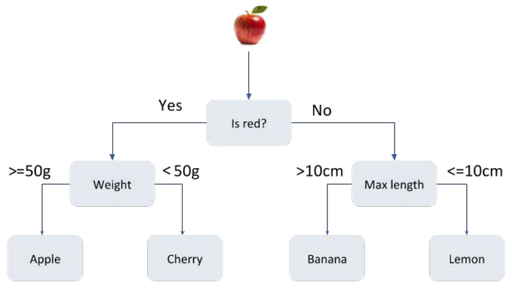


Let's discuss some defining properties of decision trees. Decision trees have a hierarchical structure, which means that the rules that govern the model have an order. 

Decision trees are composed of nodes, each of which corresponds to a binary rule.

Only one attribute is considered per node, and as a result, the rules typically have the form of a question, with an answer "yes" or "no".
- For categorical variables, the rule will ask about a specific value of the variable, for example "is red?" for the colour variable.
- For continuous variables, a splitting point will be selected, for example "less than 50g?" for weight.

The end of a decision path is called a leaf, and in order to make a prediction for a new example, we just follow the decision path until it reaches a leaf.

The node can be compared to a threshold activation unit as in neural networks, acting on a single input feature. Since the different paths of the decision tree do not interact, it lacks the compositional properties of neural networks.

### Growing the tree

How can we fit a decision tree classifier? We grow from each node, recursively, choosing the "best separation" for that node.

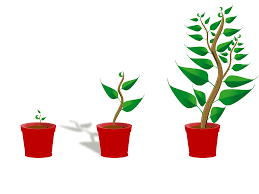

### Recursive binary splitting

Simple **divide-and-conquer** recursive algorithm, choosing **greedily** the best separation for each new node, until a stopping condition is met.

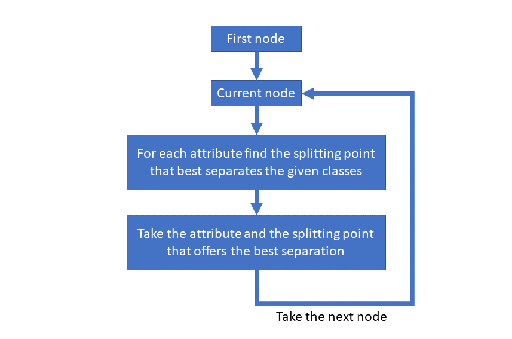

Key questions:
- How do we quantify the **"best separation"**?
- When do we **stop** creating nodes?

Making a prediction using a decision tree is very simple, but how do we actually train the model?

In order to train the model, we start from the first node. For each attribute, we find the splitting point that best separates the classes. We can only select one attribute per node, so we use the attribute and the splitting point that offers the best separation. 

Since we want to take the attribute and the splitting point that offers the best separation, we will need to consider all available attributes and splitting points. As already mentioned, the splitting points for categorical variables will be in the form of questions on if the example is of a specific category. For numeric or continuous attributes this will be more complex as we need to consider all mid-way points between examples of different classes.

When the decision rule for the first node is selected, we can move to the next node. After this other node is done, we continue with a further node, and so on.

There are two key questions:

1. How do we actually quantify the "best separation"?
2. When should we stop creating nodes?

We will start with quantifying the best separation first, and next we will discuss when we should stop creating nodes.

### Separation quality

* At each node, the decision tree should separate data samples that reach that node.

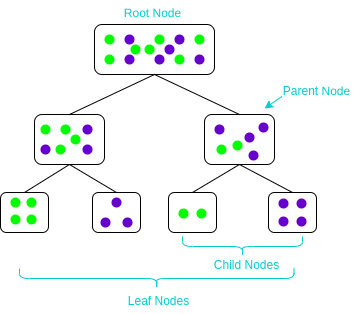

### Quantifying the best separation
Different metrics can be used to measure "**separation**". Common ones are:
* Gini gain measured through Gini impurity: $I_G = 1-\sum_{i=1}^k p_i^2$ 
* Information gain measure through entropy: $I_H = -\sum_{i=1}^k p_i log_2(p_i)$

Where $p_i$ is the proportion of samples that belong to class $i$ for that node, assuming there are $k$ classes.

There are multiple metrics that can be used to measure the separation of classes in a node. Common ones for categorical data are Gini gain that uses Gini impurity and information gain that is calculated using entropy. They lead to very similar results, but we cover both methods here. The formula for Gini impurity does not involve logarithms, so it is slightly simpler to calculate, but information gain leads to better calibrated proportions when performing probabilistic classification, due to its similarity to cross-entropy loss. 

### Gini impurity

* Intuition of **Gini impurity**: what is the **misclassification** probability for the node if we classify new samples randomly, with probability distribution proportional to the sample size of each class? E.g. if the node has in its samples 7 apples and 3 oranges, classify new data as apple with 70% probability.

* Node $P$ separates a set of examples $S$, with a proportion $p_i$ of samples in class $i$.

* **Gini impurity** for a set $S$ is:
$$G(S)= \sum_{i=1}^k P(\text{misclassified} | \text{sample is class i})  = \sum_{i=1}^k p_i \sum_{j\neq i} p_j = \sum_{i=1}^k p_i \left(1-p_i\right)= 1-\sum_{i=1}^k p_i^2$$
* A lower value is better

Let's discuss Gini impurity. Let's assume there are $k$ classes, from 1 to $k$. We will focus on a generic node $P$ that separates a set of examples $S$ into subsets $S_1$ and $S_2$ based on the values of the attribute considered. In the set $S$, there is a proportion $p_1$ of examples in class 1, $p_2$ of examples in class 2, and so on.

Before we go into the details of Gini impurity, we discuss the intuition behind this metric. Gini impurity measures how often a new point would be misclassified if we classify it at random, using the distribution of classes in the dataset. Obviously a lower value is better, so we will try to minimize Gini impurity.


### Gini impurity - example
For binary classification, $k=2$. For a set $S$, Gini impurity is $G(S)=1-(p_1^2+p_2^2)$.

For example, if $S$ is a **pure** set with only one class represented, say class 1:
$$p_1=1, p_2=0, \text{ so } G(S)=1-(1^2+0^2)=0.$$

If $S$ is **impure** and has 50% of each class:
$$p_1=0.5, p_2=0.5, \text{ so } G(S)=1-(0.5^2+0.5^2)=0.5.$$

Let's have a look at an example. For binary classification, k equals two and the formula has a very simple shape.

If the set $S$ is pure with only one class represented, class 1, then the probability of class 1 is 1 and probability of class 2 is 0. Gini impurity is simply $1-(1^2+0^2)=0$.

For an impure set with 50% of each class, both $p_1$ and $p_2$ are equal to 0.5 and Gini impurity is $1-(0.5^2+0.5^2)=0.5$.

### Gini impurity values

* For two classes, the highest impurity is for 50% of each class.

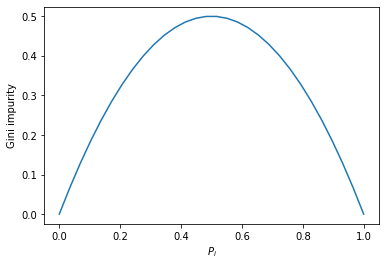

In [1]:
import numpy as np
import matplotlib.pyplot as plt

gini_impurity = lambda probs: 1 - np.sum(probs**2)

probs_range = np.linspace(0, 1, 30)

gini_values = [gini_impurity(np.array([p, 1-p])) for p in probs_range]

plt.plot(probs_range, gini_values);
plt.xlabel("$P_i$");
plt.ylabel("Gini impurity");

### Fitting a tree with Gini impurity

* Reminder: node $P$ separates a set of examples $S$ into subsets $S_1$ and $S_2$ based on the values of the attribute considered
* Question: how to define a **separation criterion** for node $P$ based on the impurity of two subsets, $S_1$ and $S_2$?
* Answer: weighted sum of the Gini impurity of the new nodes

We now know what Gini impurity is. The next step is to actually use Gini impurity for training or fitting a decision tree. Let's remind ourselves what we want to do.

Node $P$ separates a set of examples $S$ into subsets $S_1$ and $S_2$ based on the values of the attribute considered. The question is how to find the **separation criterion** for node $P$. We want to find an attribute and a splitting point that **best** separates the examples.

This leads to a further question: how to **measure** which separation is better? The answer is to use **Gini gain**, which uses Gini impurity as a fundamental part of its calculation.

### Gini gain

* Gini impurity of the original set $S$ is $G(S)$
* After applying the decision rule at node $P$, the subsets will have Gini impurities $G(S_1)$ and $G(S_2)$ (for binary attributes)
* Sizes of sets $S$, $S_1$, $S_2$ are $|S|$, $|S_1|$, $|S_2|$. $A$ represents the decision rule.
* Formula for Gini gain:
$$Gain_{Gini}(S,A)=G(S)-\sum_{i \in {1,2}} \frac{|S_i|}{|S|}G(S_i)$$

* We want to **maximize** Gini gain.
* We could also divide each node into more than two branches, e.g. into three nodes $S_1$, $S_2$, $S_3$ for three feature values "red", "blue", "yellow", but we focus here on binary splits.

Before we go to the formula, we describe the notation that we use.

* Gini impurity of the original set $S$ is $G(S)$
* After applying the decision rule at node $P$, the subsets will have Gini impurities $G(S_1)$ and $G(S_2)$
* Sizes of sets $S$, $S_1$, $S_2$ are $|S|$, $|S_1|$, $|S_2|$
* The attribute and the splitting point in question are collectively denoted as $A$
* $\sum_{i \in values(A)}$ means we sum over all possible values of $A$
* Available values for $A$ will usually be 0 and 1 (binary attributes)

The formula for Gini gain is the difference between the Gini impurity of the original set of examples $S$, and the weighted Gini impurities of the subsets based on how many examples they contain. We will select the combination of attribute and splitting point (collectively denoted as $A$) that maximizes the Gini gain.

### Gini gain - example

* Suppose we have a set of apples and oranges and how much they weigh. What is the best decision threshold to separate the classes?

In [2]:
def gen_data(n_samples = 80):
    random_weight = lambda n=1,mu=150,st=30: np.random.randn(n)*st + mu
    weights = np.array([150,200]) # mean weight (g) for apples and oranges
    prob_apple = 0.4 # probability of apples
    
    labels = np.int32(np.random.rand(n_samples) > prob_apple)
    weights = np.array([random_weight(mu=weights[l]) for l in labels]).reshape(-1)
    
    return weights, labels

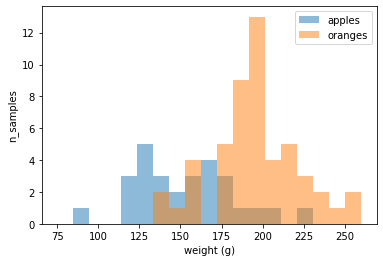

In [3]:
np.random.seed(25)

weights, labels = gen_data(n_samples = 80)

plt.hist(weights[labels==0],alpha=0.5,bins=np.linspace(75,260,20), label="apples");
plt.hist(weights[labels==1],alpha=0.5,bins=np.linspace(75,260,20), label='oranges');
plt.legend(loc='upper right');
plt.xlabel("weight (g)");
plt.ylabel("n_samples");

### Gini gain - optimal decision threshold

* Choose the decision threshold for the weight with highest Gini gain

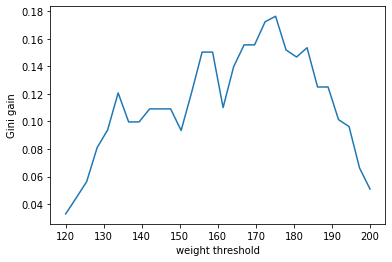

In [4]:
gini_imp = lambda labs: 1 - np.mean(labs==0)**2 - np.mean(labs==1)**2
gini_gain = lambda S, S1, S2: gini_imp(S) - (len(S1)/len(S))*gini_imp(S1) - (len(S2)/len(S))*gini_imp(S2)

thres = np.linspace(120,200,30) # decision thresholds

gains = [gini_gain(labels, labels[weights<th], labels[weights>th]) for th in thres]

plt.plot(thres,gains);
plt.xlabel("weight threshold")
plt.ylabel("Gini gain");

We can calculate for our dataset, the Gini gain for different decision thresholds. We see that it is best around 170 grams, which makes sense looking at the previous plot with the distributions of each category.

Lower values for the threshold would perhaps separate small apples well, but a higher threshold would be mixed.

### Example: visualize tree

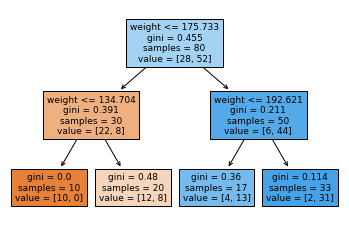

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(max_depth=2, random_state=25)
dtc.fit(weights.reshape(-1,1), labels)

tree.plot_tree(dtc, filled=True, fontsize=9, feature_names=["weight"]);

Sklearn makes it easy to fit a decision tree and visualize it. We see for our example, for depth 2, that first it separates at weight 175 grams, as we had calculated. The second level splits separate the weight further. See how the leftmost node, for weight < 134g, has only apples, so the Gini impurity is zero. 

### Information gain and entropy measure

* An alternative measure of separation is based on the entropy of the sample sets: $$I_H = -\sum_{i=1}^k p_i log_2(p_i)$$
* The information gain for a split is: 
$$Gain_{H}(S,A)=I_H(S)-\sum_{i \in {1,2}} \frac{|S_i|}{|S|}I_H(S_i)$$

The other common measure of separation is by the entropy of the sets. The gain in entropy after a node split is calculated similarly to Gini gain. This measure has similar properties to Gini.

You can learn about information gain and entropy [here](https://homes.cs.washington.edu/~shapiro/EE596/notes/InfoGain.pdf "Information Gain") and [here](https://www.ke.tu-darmstadt.de/lehre/archiv/ws0809/mldm/dt.pdf "Decision-Tree Learning"). The second link here also gives details of selected decision tree algorithms (ID3 and C4.5).

### Regression with decision trees
* Decision trees can also be used for **regression**
* Prediction value of a leaf is defined as the **average** of the target value across training examples in the leaf
* The regression quality of a node is given by the variance of the node target values, $V(S)$. 
* A node with variance zero, $V(S) = 0$, means all samples have same target value, with zero error of the prediction
* Different splitting criterion: **variance reduction**: $$Gain_V = V(S)-\sum_{i \in {1,2}} \frac{|S_i|}{|S|}V(S_i)$$

Decision trees can be used to investigate classification problems as we have already explained, but it is interesting to know that they can also do regression if we make some changes to the approach. For prediction, we can predict the average of the target feature across training examples in the leaf. While for classification we used Gini gain as the splitting criterion, for regression we need an alternative: known as variance reduction.

Recall from logistic regression, by passing regression values through the sigmoid/softmax function, we can obtain choice probabilities - more on this later!

### Feature importance
* Allows us to find which features are the most important for classification
* Defined as the normalized **Gini gain** for nodes split with the feature
* Normalized by the probability of reaching the node

$$\text{Feature Importance}=\frac{|S|}{N} \left(G(S) - \frac{|S_1|}{|S|} G(S_1) - \frac{|S_2|}{|S|} G(S_2) \right)$$

When we build a decision tree, we may be interested in the importance of the different features and the relative difference in importance between features. Feature importance is related to Gini impurity, and it can be calculated as normalized reduction in Gini impurity if we split on the given feature. It is normalized by the probability of reaching the specific part of the tree.

### When to stop splitting? Pruning criteria

If we keep splitting forever, we get end with completely sorted leaf nodes **(overfitting)**:
* Unique (*almost!*) decision path for every observation in sample
* Does not generalize well to new data

To prevent overfitting we control the complexity of the tree with pruning criteria:
   * **maximum depth** of any branch
   * **minimum number of samples** needed in a new node/leaf
   * **minimum Gini gain** for a node split
    
How to choose the parameters:
* Evaluate performance on the **validation set**


A key question in building decision trees is when to stop splitting? If we keep splitting forever, then we get purely sorted leaf nodes. This allows us to classify training data perfectly, but it does not generalize well (i.e. it results in overfitting). To prevent this undesirable behaviour, there are multiple options we can explore, e.g.: 1) pick a maximum depth, which controls the maximum complexity of our tree, 2) pick a minimum number of samples needed in a new node/leaf, which controls the overfitting to a few samples, or 3) pick a minimum gain threshold that needs to be achieved for a splut to occur. These strategies are also known as decision tree pruning.

How do we choose these parameters in practice? The answer is to use a validation set. We choose a parameter, fit the model to the training data and measure the performance on the validation set. We then tune the parameter value to get the best result on the validation set.

### Bias vs Variance
* Where would we place a DTC with *max_depth=None*?
* Where would we place a DTC with *max_depth=2*?
* Trade-off between bias and variance relates to the complexity of the model
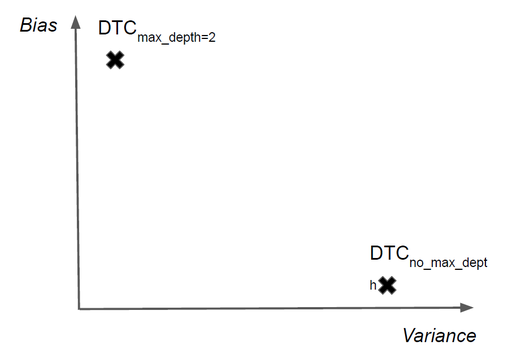




When discussing machine learning models, we often encounter the concept of a trade-off between a model's bias and its variance.

A model with a large bias will not pay much attention to the training data and will oversimplify the modeling process. In the case of decision trees, a model with a depth of two will have a large bias.

On the other hand, a model with a large variance will fit too closely to the training data and will have problems generalizing to new unseen data. This is the case for fully-grown trees with no limit on the depth.

The trade-off between bias and variance is related to the trade-off in the complexity of the model, so we need to make sure our model is not too simple or too complex. In the context of decision trees this typically relates to finding a suitable depth of the tree.

Bias and variance trade-off is explained well [here](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229 "Understanding the Bias-Variance Trade-off").

### Controlling model complexity

* For each meta-parameter that regulates the model complexity, there will be a trade-off between fitting the training data and generalizing to unseen data.

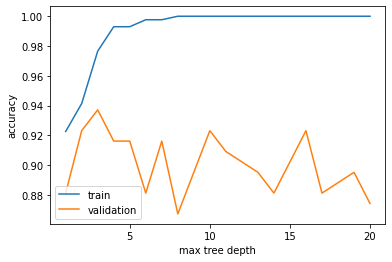

In [6]:


import sklearn.datasets
from sklearn.model_selection import train_test_split

data = sklearn.datasets.load_breast_cancer()

features, features_val, labels, labels_val = train_test_split(data['data'], data['target'], random_state=0)

depths = np.arange(1,21)
dtcs = []
accs = []
val_accs = []

for d in depths:
    dtc_ = DecisionTreeClassifier(max_depth = d) # train trees with different depths
    dtc_.fit(features, labels)
    dtc_.predict(features_val)
    acc = np.mean(dtc_.predict(features) == labels)
    val_acc = np.mean(dtc_.predict(features_val) == labels_val) # accuracy on validation set
    
    dtcs.append(dtc_)
    accs.append(acc)
    val_accs.append(val_acc)
    
plt.plot(depths, accs)
plt.plot(depths, val_accs)
plt.xticks(ticks=np.arange(5,21,5))
plt.xlabel("max tree depth")
plt.ylabel("accuracy");
plt.legend(["train", "validation"]);

With larger depth, the predictions get better for the training data, but it is due to overfitting.

The variability in the validation accuracy is due to the small sample size, but also shows how brittle decision tree training is.

### Handling missing values

* **Imputation**: same as for other algorithms, fill in with typical values (e.g. median, mode, ...), within class or overall.
* **Null value**: create a categorical attribute for missing values. Good solution when missing values have meaning. E.g. survey subjects with very high income often don't divulge their income.
* **Ignore** while splitting: when calculating the separation gain of each feature, ignore missing values for that feature. At testing, assign samples with missing values for a feature randomly, proportional to number of samples in training for that feature split.

There are multiple approaches to handling missing values for decision tree training. The best choice will depend on the number of samples with missing values and the nature of the missing values.

### Random forest

* Single decision tree training can brittle, varying a lot for small changes in the input data
* Random forest: **ensemble** of $k$ decision trees
* Each tree is grown using a **random subset** of all training examples
* Classification of a new example: each tree makes a prediction and then final prediction is done using **majority vote** - most popular class is selected
* The average proportions at each node across the ensemble can be used to generate **probabilities**
* Often offers a very competitive performance

Decision trees can be combined together into ensembles so that they can achieve superb performance. In particular, random forest is an ensemble of $k$ decision trees, each of which is grown using a random subset of all training examples.

Classification of a new example is done by each tree making a prediction and then a majority vote decides the final prediction - the most popular class is selected. Random forests tend to work very well in practice.

### Pros and cons of decision trees

**Pros:**
* Easy to **interpret**
* No need to **scale** data - no comparisons between features
* Can handle **both** **numerical** and **categorical** data
* Gives access to **features' importance**
* **Compact**
* Making predictions is **fast** - scales with the tree depth
 
**Cons:**
* Can **overfit** easily
* **Not robust**: small variations in data can result in very different results
* **Biased** if the dataset is **imbalanced**


Let's conclude our lecture by discussing the pros and cons of decision trees.

Decision trees have many benefits - they are very easy to interpret, there is no need to scale data (as no comparisons are done between features), they can handle both numerical and categorical data, and we can get access to features' importance. In addition, they are compact and making predictions is fast - it scales with the tree depth.

Decision trees also have some negatives - they can overfit easily, so we need to make sure good parameters are used. Decision trees are also not very robust, in the sense that small variations in data can result in very different results. Finally they are biased if the dataset is imbalanced. Class imbalance in a dataset can be alleviated by various strategies, for example resampling, so the problem can be at least partially resolved.